In [67]:
#import libraries:
import pandas as pd
import matplotlib as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

### data gathring:


In [3]:
#Read in the dataset and take a look at the top few rows here:
df = pd.read_csv('tmdb-movies.csv')

### data assessing and cleaning:

In [4]:
#Find the number of rows and columns in the dataset.
df.shape

(10866, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [9]:
#drop unwanted columns: 
df.drop(['imdb_id','cast','homepage','tagline','overview','production_companies'], inplace = True, axis = 1)

In [10]:
df.head()

,id,popularity,budget,revenue,original_title,director,keywords,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [12]:
#correct the wrong data type to a propper type
df.release_date = pd.to_datetime(df.release_date)
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10866 non-null  int64         
 1   popularity      10866 non-null  float64       
 2   budget          10866 non-null  int64         
 3   revenue         10866 non-null  int64         
 4   original_title  10866 non-null  object        
 5   director        10822 non-null  object        
 6   keywords        9373 non-null   object        
 7   runtime         10866 non-null  int64         
 8   genres          10843 non-null  object        
 9   release_date    10866 non-null  datetime64[ns]
 10  vote_count      10866 non-null  int64         
 11  vote_average    10866 non-null  float64       
 12  release_year    10866 non-null  int64         
 13  budget_adj      10866 non-null  float64       
 14  revenue_adj     10866 non-null  float64       
dtypes:

In [20]:
#How many missing values in the dataset?
df.isnull().sum().sum()

0

In [19]:
#drop null values
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9352 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              9352 non-null   int64         
 1   popularity      9352 non-null   float64       
 2   budget          9352 non-null   int64         
 3   revenue         9352 non-null   int64         
 4   original_title  9352 non-null   object        
 5   director        9352 non-null   object        
 6   keywords        9352 non-null   object        
 7   runtime         9352 non-null   int64         
 8   genres          9352 non-null   object        
 9   release_date    9352 non-null   datetime64[ns]
 10  vote_count      9352 non-null   int64         
 11  vote_average    9352 non-null   float64       
 12  release_year    9352 non-null   int64         
 13  budget_adj      9352 non-null   float64       
 14  revenue_adj     9352 non-null   float64       
dtypes: 

In [28]:
#how many diplicated rows?
df.duplicated().sum()

1

In [31]:
#drop diplicated rows
df.drop_duplicates(inplace = True)

In [35]:
#splitting genres column:
df['genres']=df['genres'].str.split('|', 1,expand=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9351 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              9351 non-null   int64         
 1   popularity      9351 non-null   float64       
 2   budget          9351 non-null   int64         
 3   revenue         9351 non-null   int64         
 4   original_title  9351 non-null   object        
 5   director        9351 non-null   object        
 6   keywords        9351 non-null   object        
 7   runtime         9351 non-null   int64         
 8   genres          9351 non-null   object        
 9   release_date    9351 non-null   datetime64[ns]
 10  vote_count      9351 non-null   int64         
 11  vote_average    9351 non-null   float64       
 12  release_year    9351 non-null   int64         
 13  budget_adj      9351 non-null   float64       
 14  revenue_adj     9351 non-null   float64       
dtypes: 

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.


## Question 1: Average revenue for Action movies

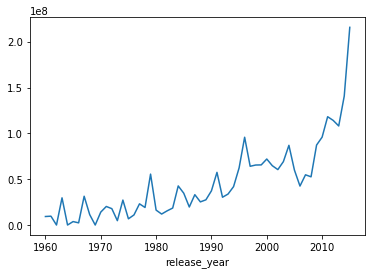

In [78]:
df_a = df[df.genres == 'Action'].groupby('release_year').revenue.mean()
df_a.plot.line()

Finding: Action movies have gained more revenue over the years

## Question2 : Top 10 movies in 2011

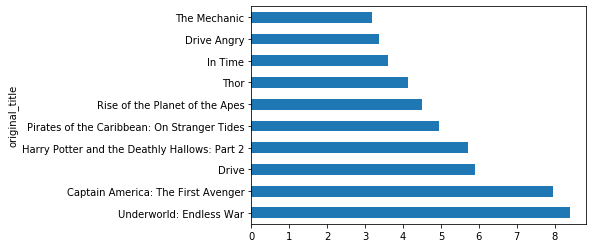

In [76]:
df_t = df[df['release_year']==2011].groupby('original_title')['popularity'].mean().sort_values(ascending = False).head(10)
df_t.plot.barh()

Finding: The most popular movie in 2011 was Underworld: Endless War followed by Captain America: The First Avenger

## Question3: Movie directors with the longest average runtime

In [59]:
df.losdf.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,9351.000000,9351.000000,9.351000e+03,9.351000e+03,9351.000000,9351.000000,9351.000000,9351.000000,9.351000e+03,9.351000e+03
mean,58606.051866,0.705402,1.647595e+07,4.568023e+07,103.206930,246.593306,6.005048,2000.442413,1.982497e+07,5.900950e+07
std,86949.775385,1.061476,3.262976e+07,1.247920e+08,28.626988,614.713226,0.912042,13.068756,3.612864e+07,1.542230e+08
min,5.000000,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10013.500000,0.229482,0.000000e+00,0.000000e+00,91.000000,19.000000,5.400000,1993.000000,0.000000e+00,0.000000e+00
50%,17245.000000,0.421018,2.750000e+05,0.000000e+00,100.000000,47.000000,6.100000,2005.000000,4.693105e+05,0.000000e+00
75%,59149.500000,0.787729,2.000000e+07,3.342816e+07,113.000000,180.000000,6.600000,2011.000000,2.546816e+07,4.613683e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


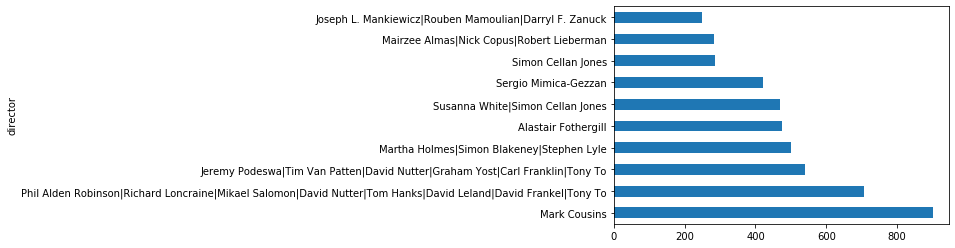

In [82]:
df_d = df.groupby('director')['runtime'].mean().sort_values(ascending = False).head(10)
df_d.plot.barh()

Finding: Mark cousins has the most average movie runtime of all the directors

# Conclusion:

The data has some inconstancies; for example, some movies have a 0 minute runtime and some have over 800 minutes. However, there are some valuable insights regarding the revenue, genres and popularity.

In [ ]:
#export the dataframe to csv file:
df.to_csv('tmdb_movies_cleaned.csv')